In [1]:
import tensorflow as tf
import numpy as np
import os, time
import matplotlib.pyplot as plt
%matplotlib inline

import publicMethod

Import publicMethod


In [2]:
# tf.keras.optimizers.Optimizer?
# tf.keras.optimizers.SGD?
# tf.keras.optimizers.Adam?
# tf.saved_model.save?
# tf.saved_model.load?
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
LOAD_PATH = "./npy/"
SITE_CODE = "722860"
localtime = time.time()
os.mkdir(f"tf_model_params_{localtime}")
SAVE_PATH = f"./tf_model_3in1_params_{localtime}/"
paths = []
for dirname, _, filenames in os.walk(LOAD_PATH):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
print(paths)

['./npy/.DS_Store', './npy/max_722860.npy', './npy/min_745700.npy', './npy/avg_722860.npy', './npy/min_722860.npy', './npy/max_745700.npy', './npy/.npy', './npy/avg_745700.npy']


In [4]:
def construct_model(train_data, train_label, test_data, test_label):
    #strategy = tf.distribute.MirroredStrategy()
    #with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(21,)),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(lr = 1e-6),
                  loss='mse')
    model.summary()

    model.fit(train_data, train_label, epochs=100)

    model.evaluate(test_data, test_label)
    
    return model

In [5]:
def retrain(model, train_data, train_label):
    print("\033[0;31;47m重新训练25次\033[0m")
    model.fit(train_data, train_label, epochs=25)
    return model

In [25]:
def plot(model_predict, test_label, predict_train, train_label, i, name):
    global SITE_CODE
    fig, axes = plt.subplots(4, 1)
    error = model_predict.T[0] - test_label
    axes[0].plot((-error))
    axes[1].plot(test_label, "r")
    axes[1].plot(model_predict, "g")
    
    print(predict_train.shape)
    
    error = predict_train.T[0] - train_label
    axes[2].plot((-error))
    axes[3].plot(train_label, "r")
    axes[3].plot(predict_train, "g")
    plt.xlabel(f"data {name} imf {i} from %s"%SITE_CODE)
    plt.ylabel("Temperature/F")
    plt.gcf().set_size_inches(14, 20)
    plt.savefig(f"./fig/Error_{name}_imf{i}_%s.jpg"%SITE_CODE)
    plt.show()

False
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 21)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               2816      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 27,649
Trainable params: 27,649
Non-trainable params: 0
____________________________________________

707/707 [==============================] - 1s 1ms/step - loss: 3.2664
Epoch 86/100
707/707 [==============================] - 1s 1ms/step - loss: 3.3082A: 0s - loss: 3.308
Epoch 87/100
707/707 [==============================] - 1s 1ms/step - loss: 3.3378
Epoch 88/100
707/707 [==============================] - 1s 1ms/step - loss: 3.2974
Epoch 89/100
707/707 [==============================] - 1s 1ms/step - loss: 3.2083
Epoch 90/100
707/707 [==============================] - 1s 1ms/step - loss: 3.2188
Epoch 91/100
707/707 [==============================] - 1s 1ms/step - loss: 3.2260
Epoch 92/100
707/707 [==============================] - 1s 1ms/step - loss: 3.2135
Epoch 93/100
707/707 [==============================] - 1s 1ms/step - loss: 3.2756
Epoch 94/100
707/707 [==============================] - 1s 1ms/step - loss: 3.2108A: 0s - loss: 3
Epoch 95/100
707/707 [==============================] - 1s 1ms/step - loss: 3.1980
Epoch 96/100
707/707 [==============================] - 1s 1ms/ste

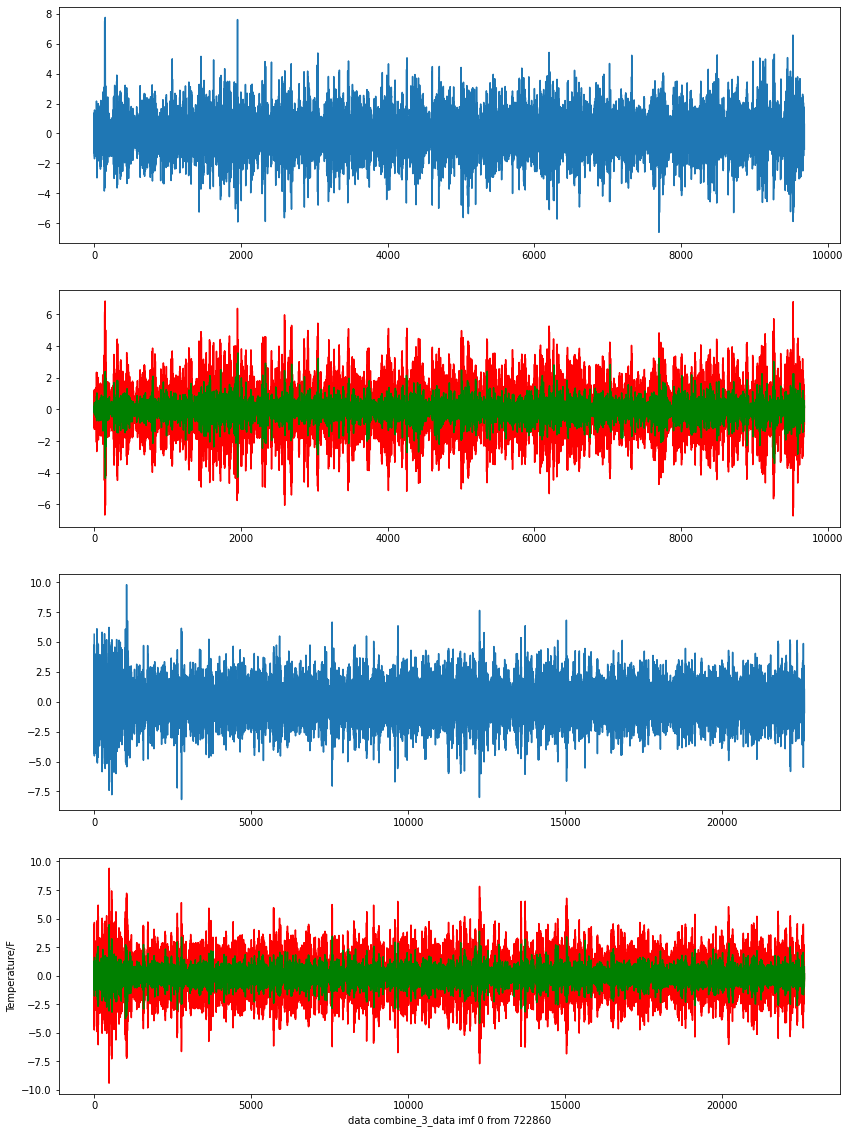

Epoch:0
MSE
TRAIN:2.5961121802882006	TEST:2.727438067005795
Base_line:6.384291999559335	DIFFERENT:3.65685393255354
TARGET:6.384291999559335
INFO:tensorflow:Assets written to: ./tf_model_params_1628005325.360426/722860_combine_3_data_imf0.params/assets
-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________

707/707 [==============================] - 1s 1ms/step - loss: 3.5491
Epoch 82/100
707/707 [==============================] - 1s 1ms/step - loss: 3.3646
Epoch 83/100
707/707 [==============================] - 1s 1ms/step - loss: 3.5279
Epoch 84/100
707/707 [==============================] - 1s 1ms/step - loss: 3.4005
Epoch 85/100
707/707 [==============================] - 1s 1ms/step - loss: 3.4379
Epoch 86/100
707/707 [==============================] - 1s 1ms/step - loss: 3.4119
Epoch 87/100
707/707 [==============================] - 1s 1ms/step - loss: 3.4521
Epoch 88/100
707/707 [==============================] - 1s 1ms/step - loss: 3.4316
Epoch 89/100
707/707 [==============================] - 1s 1ms/step - loss: 3.4454
Epoch 90/100
707/707 [==============================] - 1s 1ms/step - loss: 3.4695
Epoch 91/100
707/707 [==============================] - 1s 991us/step - loss: 3.4922
Epoch 92/100
707/707 [==============================] - 1s 963us/step - loss: 3.4009
Epoch 93/100


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


(22616, 1)


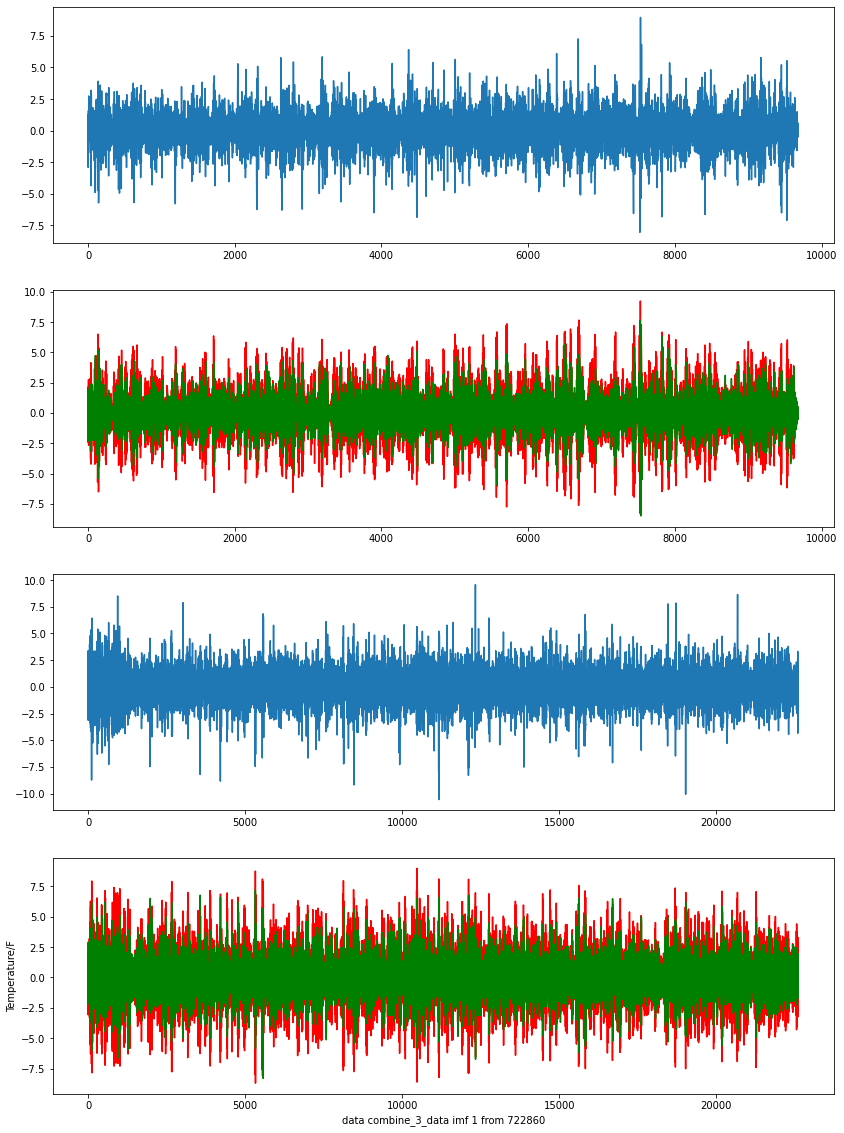

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in double_scalars


Epoch:0
MSE
TRAIN:2.609656069976922	TEST:2.594824264331932
Base_line:3.2298899743371816	DIFFERENT:0.6350657100052497
TARGET:inf
INFO:tensorflow:Assets written to: ./tf_model_params_1628005325.360426/722860_combine_3_data_imf1.params/assets
-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (De

Epoch 81/100
707/707 [==============================] - 1s 1ms/step - loss: 2.2661
Epoch 82/100
707/707 [==============================] - 1s 1ms/step - loss: 2.2369
Epoch 83/100
707/707 [==============================] - 1s 1ms/step - loss: 2.2620
Epoch 84/100
707/707 [==============================] - 1s 1ms/step - loss: 2.2374
Epoch 85/100
707/707 [==============================] - 1s 1ms/step - loss: 2.2540
Epoch 86/100
707/707 [==============================] - 1s 1ms/step - loss: 2.1653
Epoch 87/100
707/707 [==============================] - 1s 1ms/step - loss: 2.2168
Epoch 88/100
707/707 [==============================] - 1s 1ms/step - loss: 2.2281
Epoch 89/100
707/707 [==============================] - 1s 1ms/step - loss: 2.1180
Epoch 90/100
707/707 [==============================] - 1s 1ms/step - loss: 2.1525
Epoch 91/100
707/707 [==============================] - 1s 966us/step - loss: 2.1927
Epoch 92/100
707/707 [==============================] - 1s 1ms/step - loss: 2.1631
Ep

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars


707/707 [==============================] - 1s 947us/step - loss: 2.1025
Epoch 2/25
707/707 [==============================] - 1s 996us/step - loss: 2.0855
Epoch 3/25
707/707 [==============================] - 1s 1ms/step - loss: 2.1377A: 0s - loss:
Epoch 4/25
707/707 [==============================] - 1s 1ms/step - loss: 2.0761
Epoch 5/25
707/707 [==============================] - 1s 1ms/step - loss: 2.1050
Epoch 6/25
707/707 [==============================] - 1s 1ms/step - loss: 2.0599
Epoch 7/25
707/707 [==============================] - 1s 1ms/step - loss: 2.0568
Epoch 8/25
707/707 [==============================] - 1s 1ms/step - loss: 2.0499
Epoch 9/25
707/707 [==============================] - 1s 989us/step - loss: 2.0382
Epoch 10/25
707/707 [==============================] - 1s 897us/step - loss: 2.0384
Epoch 11/25
707/707 [==============================] - 1s 875us/step - loss: 2.0389
Epoch 12/25
707/707 [==============================] - 1s 907us/step - loss: 2.0191
Epoch 13/25

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


(22616, 1)


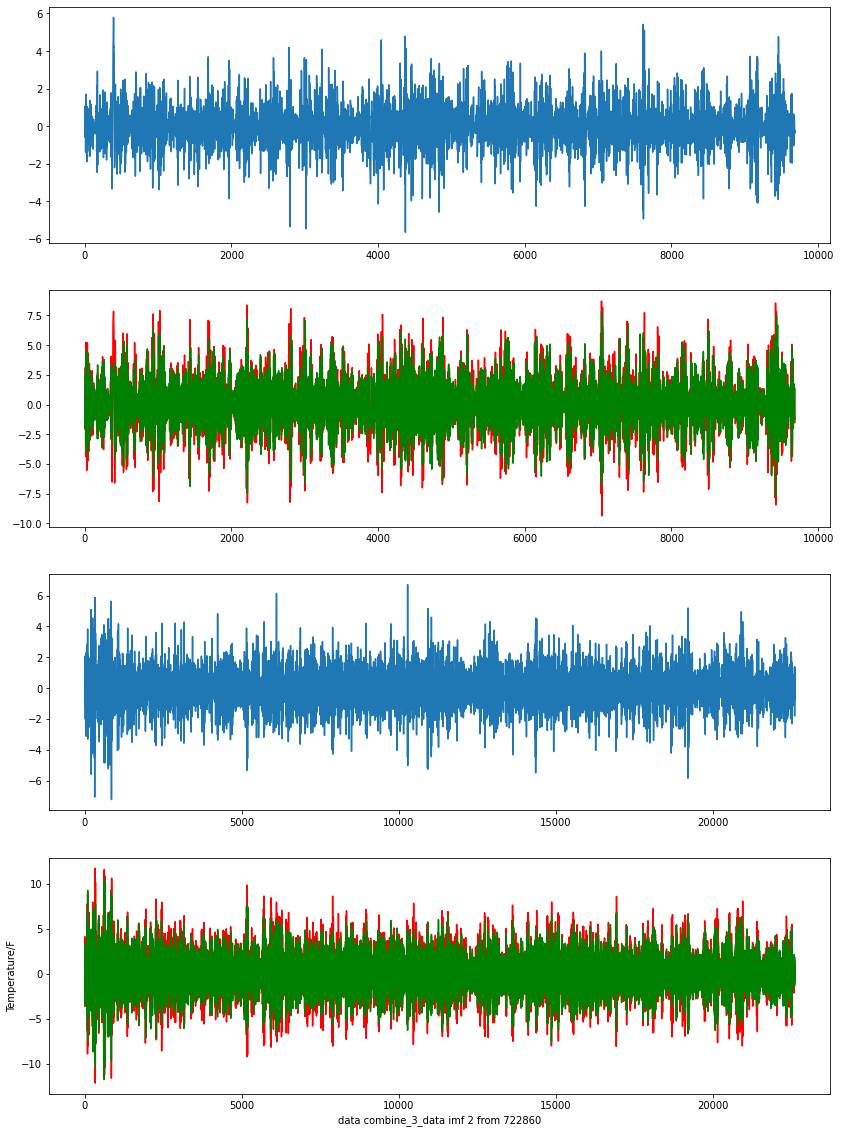

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in double_scalars


Epoch:1
MSE
TRAIN:1.3783022395088296	TEST:1.330592533800321
Base_line:1.4063151995702567	DIFFERENT:0.0757226657699357
TARGET:inf
INFO:tensorflow:Assets written to: ./tf_model_params_1628005325.360426/722860_combine_3_data_imf2.params/assets
-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (D

707/707 [==============================] - 1s 1ms/step - loss: 1.3784A: 0s 
Epoch 82/100
707/707 [==============================] - 1s 1ms/step - loss: 1.3610
Epoch 83/100
707/707 [==============================] - 1s 1ms/step - loss: 1.3527
Epoch 84/100
707/707 [==============================] - 1s 2ms/step - loss: 1.3170
Epoch 85/100
707/707 [==============================] - 1s 1ms/step - loss: 1.3354
Epoch 86/100
707/707 [==============================] - 1s 1ms/step - loss: 1.3408
Epoch 87/100
707/707 [==============================] - 1s 1ms/step - loss: 1.3072
Epoch 88/100
707/707 [==============================] - 1s 1ms/step - loss: 1.2944
Epoch 89/100
707/707 [==============================] - 1s 1ms/step - loss: 1.2985
Epoch 90/100
707/707 [==============================] - 1s 1ms/step - loss: 1.2614
Epoch 91/100
707/707 [==============================] - 1s 1ms/step - loss: 1.2460
Epoch 92/100
707/707 [==============================] - 1s 1ms/step - loss: 1.2163
Epoch 93/10

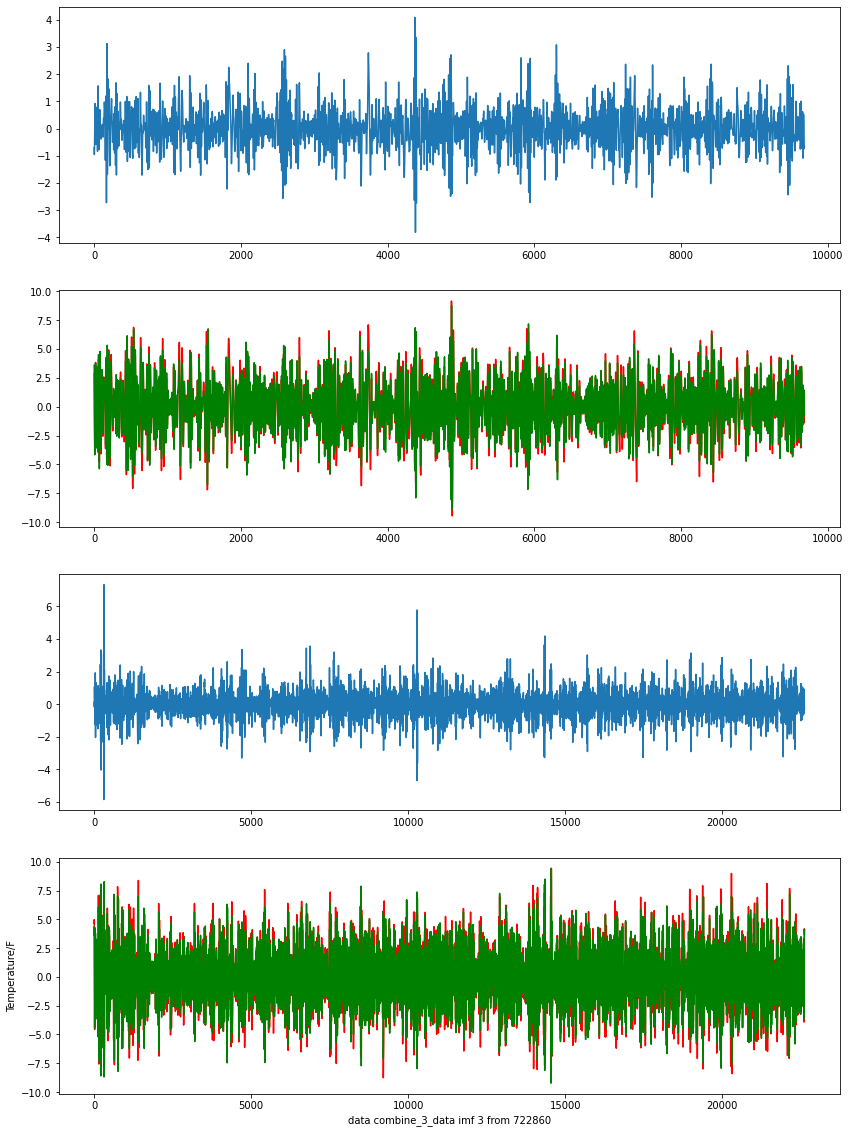

Epoch:1
MSE
TRAIN:0.5668967821151971	TEST:0.4865832959170304
Base_line:0.4206456478800104	DIFFERENT:0.06593764803702001
TARGET:-0.4206456478800104
INFO:tensorflow:Assets written to: ./tf_model_params_1628005325.360426/722860_combine_3_data_imf3.params/assets
-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
__________________________________________________________

707/707 [==============================] - 1s 991us/step - loss: 0.7319
Epoch 82/100
707/707 [==============================] - 1s 1ms/step - loss: 0.7626
Epoch 83/100
707/707 [==============================] - 1s 1ms/step - loss: 0.7382
Epoch 84/100
707/707 [==============================] - 1s 1ms/step - loss: 0.7253
Epoch 85/100
707/707 [==============================] - 1s 1ms/step - loss: 0.7138A: 0s - l
Epoch 86/100
707/707 [==============================] - 1s 1ms/step - loss: 0.7351
Epoch 87/100
707/707 [==============================] - 1s 1ms/step - loss: 0.6933
Epoch 88/100
707/707 [==============================] - 1s 1ms/step - loss: 0.6863
Epoch 89/100
707/707 [==============================] - 1s 1ms/step - loss: 0.6932
Epoch 90/100
707/707 [==============================] - 1s 997us/step - loss: 0.6858
Epoch 91/100
707/707 [==============================] - 1s 1ms/step - loss: 0.6784
Epoch 92/100
707/707 [==============================] - 1s 1ms/step - loss: 0.6659
Epoc

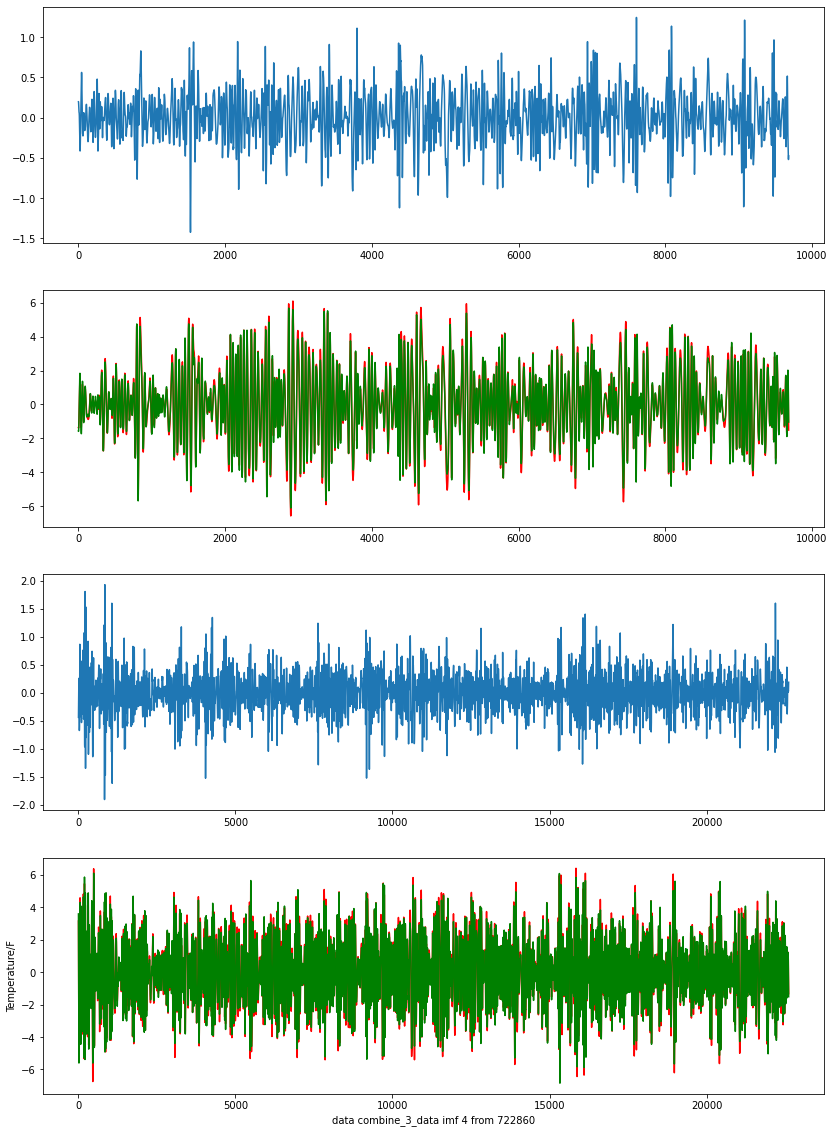

Epoch:1
MSE
TRAIN:0.10913815005784262	TEST:0.09467079097678283
Base_line:0.07800817042557794	DIFFERENT:0.01666262055120489
TARGET:-0.03900408521278897
INFO:tensorflow:Assets written to: ./tf_model_params_1628005325.360426/722860_combine_3_data_imf4.params/assets
-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
______________________________________________________

707/707 [==============================] - 1s 966us/step - loss: 0.5890
Epoch 82/100
707/707 [==============================] - 1s 1ms/step - loss: 0.5942
Epoch 83/100
707/707 [==============================] - 1s 1ms/step - loss: 0.6041
Epoch 84/100
707/707 [==============================] - 1s 1ms/step - loss: 0.6225
Epoch 85/100
707/707 [==============================] - 1s 1ms/step - loss: 0.5962
Epoch 86/100
707/707 [==============================] - 1s 1ms/step - loss: 0.6011
Epoch 87/100
707/707 [==============================] - 1s 1ms/step - loss: 0.5917
Epoch 88/100
707/707 [==============================] - 1s 1ms/step - loss: 0.5740
Epoch 89/100
707/707 [==============================] - 1s 1ms/step - loss: 0.5842
Epoch 90/100
707/707 [==============================] - 1s 1ms/step - loss: 0.5693
Epoch 91/100
707/707 [==============================] - 1s 1ms/step - loss: 0.5697
Epoch 92/100
707/707 [==============================] - 1s 1ms/step - loss: 0.5591
Epoch 93/100
70

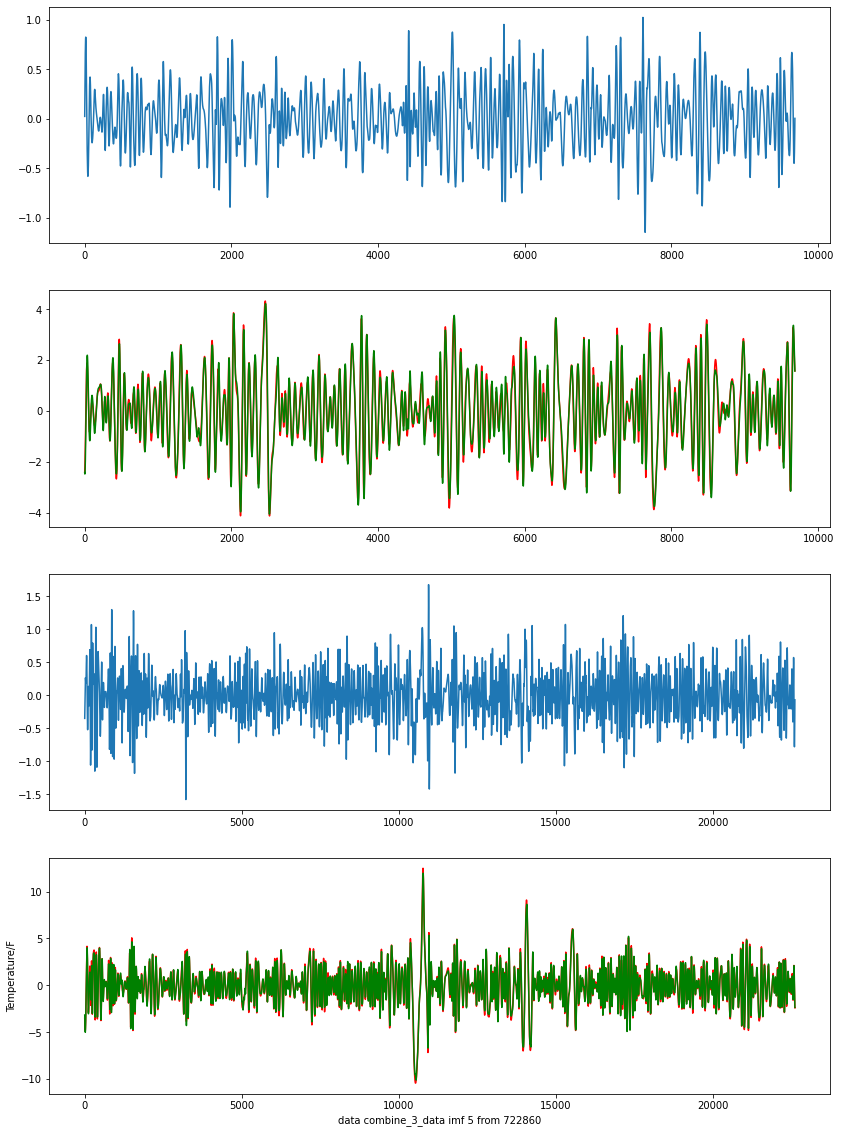

Epoch:1
MSE
TRAIN:0.12393295013753039	TEST:0.09224451050149741
Base_line:0.014249750336895196	DIFFERENT:0.07799476016460222
TARGET:-0.004749916778965065
INFO:tensorflow:Assets written to: ./tf_model_params_1628005325.360426/722860_combine_3_data_imf5.params/assets
-------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               2816      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
____________________________________________________

707/707 [==============================] - 1s 1ms/step - loss: 0.9135
Epoch 82/100
707/707 [==============================] - 1s 1ms/step - loss: 0.9065
Epoch 83/100
707/707 [==============================] - 1s 1ms/step - loss: 0.9095
Epoch 84/100
707/707 [==============================] - 1s 1ms/step - loss: 0.9211
Epoch 85/100
707/707 [==============================] - 1s 1ms/step - loss: 0.9042
Epoch 86/100
707/707 [==============================] - 1s 2ms/step - loss: 0.8941
Epoch 87/100
707/707 [==============================] - 1s 2ms/step - loss: 0.8987
Epoch 88/100
707/707 [==============================] - 1s 2ms/step - loss: 0.8638
Epoch 89/100
707/707 [==============================] - 1s 2ms/step - loss: 0.8878
Epoch 90/100
707/707 [==============================] - 1s 2ms/step - loss: 0.8756A: 0s - loss:
Epoch 91/100
707/707 [==============================] - 1s 1ms/step - loss: 0.8572
Epoch 92/100
707/707 [==============================] - 1s 1ms/step - loss: 0.8418
Epoc

KeyboardInterrupt: 

In [37]:
name = "combine_3_data"
error = []
train_set_avg = np.load(f"./npy/avg_%s.npy"%SITE_CODE)
train_set_min = np.load(f"./npy/min_%s.npy"%SITE_CODE)
train_set_max = np.load(f"./npy/max_%s.npy"%SITE_CODE)

print(train_set_max[3][432] == train_set_avg[3][432])

for i in range(len(train_set_avg)):
    train_sub_avg = train_set_avg[i]
    train_sub_min = train_set_min[i]
    train_sub_max = train_set_max[i]
    
    train_index = int(len(train_set_avg[0])*.7+5/9)
    
    (train_data_avg, train_label), (test_data_avg, test_label) = publicMethod.generate(train_index, train_sub_avg)
    (train_data_min, _), (test_data_min, _) = publicMethod.generate(train_index, train_sub_min)
    (train_data_max, _), (test_data_max, _) = publicMethod.generate(train_index, train_sub_max)

    train_data = np.concatenate([train_data_avg, train_data_min, train_data_max], axis = 1)
    test_data = np.concatenate([test_data_avg, test_data_min, test_data_max], axis = 1)
    
    # print(train_data_avg[0] == train_data_min[0], train_set[0])
    
    model = construct_model(train_data, train_label, test_data, test_label)
    
    mse_test = np.sum((model.predict(test_data) - test_label.reshape(-1, 1))**2)/len(test_label)
    mse_train = np.sum((model.predict(train_data) - train_label.reshape(-1, 1))**2)/len(train_label)
    
    fail_safe, index = True, 0
    base_line = np.sum((train_sub_avg[1:] - train_sub_avg[:-1])**2)/(len(train_sub_avg)-1)
    
    while mse_test >= base_line/(index-i+1) and fail_safe:
        index += 1
        print(f"\bEpoch:{index}\nMSE\nTRAIN:{mse_train}\tTEST:{mse_test}\nBase_line:{base_line}\tDIFFERENT:{abs(base_line - mse_test)}\nTARGET:{base_line/(index-i+1)}\033[0m")
        model = retrain(model, train_data, train_label)
        mse_test = np.sum((model.predict(test_data) - test_label.reshape(-1, 1))**2)/len(test_label)
        mse_train = np.sum((model.predict(train_data) - train_label.reshape(-1, 1))**2)/len(train_label)
            
        if index == 50:
            fail_safe = False
    
    plot(model.predict(test_data), test_label, model.predict(train_data), train_label, i, name)
    print(f"\bEpoch:{index}\nMSE\nTRAIN:{mse_train}\tTEST:{mse_test}\nBase_line:{base_line}\tDIFFERENT:{abs(base_line - mse_test)}\nTARGET:{base_line/(index-i+1)}")
    error.append(np.sum(abs(model.predict(train_data) - train_label.reshape(-1, 1)))/len(train_label))
        
    tf.saved_model.save(model, SAVE_PATH+f'{SITE_CODE}_{name}_imf{i}.params')
    print("-------------------------------------------------------------------")
    tf.keras.backend.clear_session()
    
plt.bar(range(len(error)), error)
plt.xlabel("index of imf")
plt.ylabel("Error (MAE)")
plt.title("Error Comparision")
plt.savefig(f"./fig/MAE_Error_Compare_{name}_%s.jpg"%SITE_CODE)
plt.show()

In [35]:
base_line/(len(train_data)-i+1)

0.0002822909444446116

In [36]:
len(train_data)

22616